In [1]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import time
import math
from sklearn.datasets import make_blobs
from ipynb.fs.full.Clustering import SequentialKMeans
from ipynb.fs.full.Clustering import SequentialKMeansB
from ipynb.fs.full.SyntheticDataGeneration import generate_data_of_multiple_cluster

Clustering performance evaluation: https://scikit-learn.org/stable/modules/clustering.html (Part 2.3.10)

# Testing on higly separated clusters

In [2]:
X, y = generate_data_of_multiple_cluster(centers = [(-5, -5), (5, 5)],
                                         cluster_std = [0.8, 1],
                                         nfeatures = 2,
                                         nsamples = 100)
X.shape

(100, 2)

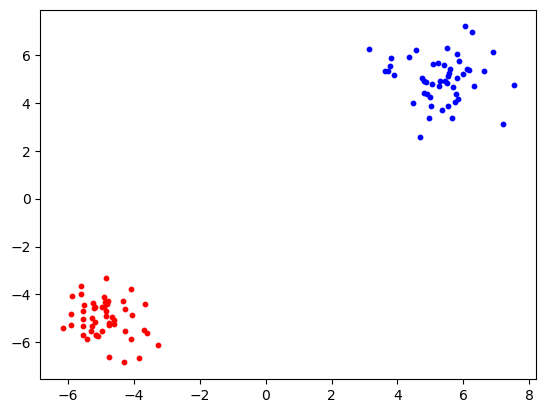

In [3]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")

## Approach 1 Sequential K-Means

In [4]:
clustering = SequentialKMeans(k=2, d=2)
for i in range(X.shape[0]):
    x = X[i,:]
    clustering.absorb_incoming_datum(x, label=True)

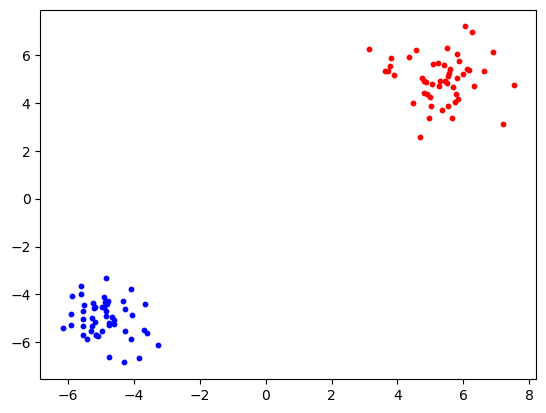

In [5]:
y_est = np.array(clustering.y)
plt.scatter(X[y_est == 0, 0], X[y_est == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y_est == 1, 0], X[y_est == 1, 1], color="blue", s=10, label="Cluster2")

In [ ]:
clusters = clustering.clusters
plt.scatter(clusters[0].centroid[0], clusters[0].centroid[1], color="red", s=10, label="Cluster1")
plt.scatter(clusters[1].centroid[0], clusters[1].centroid[1], color="blue", s=10, label="Cluster2")

## Approach 2 Sequential K-Means with Temporary Buffers

In [ ]:
clustering = SequentialKMeansB(k=2, d=2)
for i in range(X.shape[0]):
    x = X[i,:]
    clustering.absorb_incoming_datum(x)
    if i % 10 == 0:
        clustering.reset_buffer()

However the actual buffers are:

In [ ]:
X_buf = None
y_buf = None
for i in range(clustering.k):
    buf = np.array(clustering.clusters[i].points)
    labels = [clustering.clusters[i].label] * buf.shape[0]
    print(labels)
    if X_buf is None:
        X_buf = buf
        y_buf = labels
    else:
        X_buf = np.vstack((X_buf, buf))
        y_buf = y_buf + labels
y_buf = np.array(y_buf)
plt.scatter(X_buf[y_buf == 0, 0], X_buf[y_buf == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X_buf[y_buf == 1, 0], X_buf[y_buf == 1, 1], color="blue", s=10, label="Cluster2")

## Pro and Cons Approaches 1 & 2

### Sequential K-Means

Pros : 

- no extra buffer

Cons :
- inlier class only consists of two points : cluster centroid and the estimation value of outlier

### Sequential K-Means

Pros : 

- inlier class has more than two points : 
    cluster centroid, 
    the estimation value of outlier, 
    actual data points that belong to the cluster within the current window.
    Hence the decision boundary between inlier class and outlier class should be more accurate

Cons :
- require extra buffer to store data point in each cluster